# Predictive Modeling for Disease Diagnosis

# Outline:
- [Objective](#goal)
- [Tools](#tools)
- [Exploratory Data Analysis (EDA)](#eda)
  - [Data Loading](#load)
  - [Data Summary](#summary)
  - [Descriptive Statistics](#stat)
  - [Target Variable Analysis](#tar_analysis)
  - [Feature Correlation](#fet_corr)
- [Oversampling using **SMOTE**](#smote)
- [Spliting the data](#split)
- [Models](#models)
  - [Losigtic Regression](#lr)
  - [Decision Tree](#dr)
  - [Random Forest](#rf)

Objective

The objective of this project is to develop a predictive model that can accurately classify individuals into diseased or non-diseased categories based on their health attributes. By leveraging machine learning algorithms, we aim to create a reliable tool that healthcare providers can use to assist in disease diagnosis and prognosis.

In [ ]:
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

Exploratory Data Analysis (EDA)

In [ ]:
# URL's for which the data is stored
url_train_data = "https://raw.githubusercontent.com/Ad7amstein/Disease-Prediction/main/Data/train_data.csv"
url_test_data = "https://raw.githubusercontent.com/Ad7amstein/Disease-Prediction/main/Data/test_data.csv"

# Read the data as CSV files
train_data = read_csv(url_train_data)
test_data = read_csv(url_test_data)

Data Summary

In [ ]:
# Check the dimensions of the dataset
print(f"The shape of the train data: {train_data.shape}")
print(f"The shape of the test data: {test_data.shape}")

The shape of the train data: (2351, 25)
The shape of the test data: (486, 25)


In [ ]:
# Display the first few rows
train_data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [ ]:
# Check some information about the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [ ]:
# Check for missing values
train_data.isnull().sum()

,0
Glucose,0
Cholesterol,0
Hemoglobin,0
Platelets,0
White Blood Cells,0
Red Blood Cells,0
Hematocrit,0
Mean Corpuscular Volume,0
Mean Corpuscular Hemoglobin,0
Mean Corpuscular Hemoglobin Concentration,0


<Axes: >

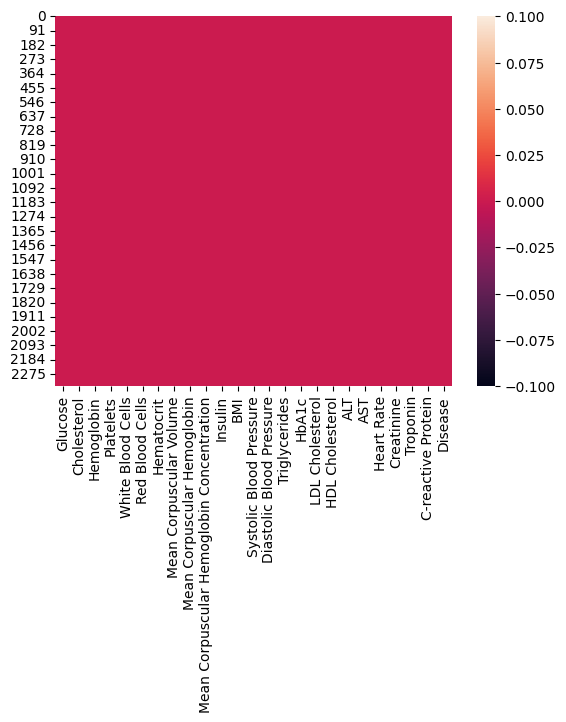

In [ ]:
# let's see the distribution of the null values
sns.heatmap(train_data.isnull())

Descriptive Statistics

In [ ]:
# Compute summary statistics for numerical features
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,2351.0,0.362828,0.251889,0.010994,0.129198,0.351722,0.582278,0.968460
Cholesterol,2351.0,0.393648,0.239449,0.012139,0.195818,0.397083,0.582178,0.905026
Hemoglobin,2351.0,0.586190,0.271498,0.003021,0.346092,0.609836,0.791215,0.983306
Platelets,2351.0,0.504027,0.303347,0.012594,0.200865,0.533962,0.754841,0.999393
White Blood Cells,2351.0,0.511086,0.277270,0.010139,0.259467,0.527381,0.743164,0.990786
Red Blood Cells,2351.0,0.506590,0.266565,0.044565,0.263589,0.467431,0.743670,1.000000
Hematocrit,2351.0,0.507152,0.285537,0.011772,0.288132,0.493428,0.753657,0.977520
Mean Corpuscular Volume,2351.0,0.492200,0.275735,0.046942,0.287532,0.453052,0.722293,0.995263
Mean Corpuscular Hemoglobin,2351.0,0.484459,0.315618,0.000554,0.207938,0.420723,0.778160,0.963235
Mean Corpuscular Hemoglobin Concentration,2351.0,0.562273,0.273281,0.006947,0.355774,0.603635,0.741381,0.975586


In [ ]:
# For categorical features, count the frequency of each category
train_data["Disease"].value_counts()

,count
Disease,
Anemia,623
Healthy,556
Diabetes,540
Thalasse,509
Thromboc,123


<Axes: xlabel='Disease'>

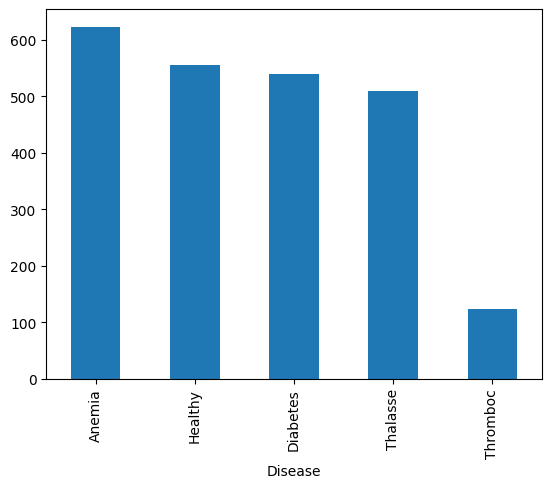

In [ ]:
# Visualize distributions of categorical features using bar plots.
train_data["Disease"].value_counts().plot(kind="bar")

Target Variable Analysis

<Axes: xlabel='Disease'>

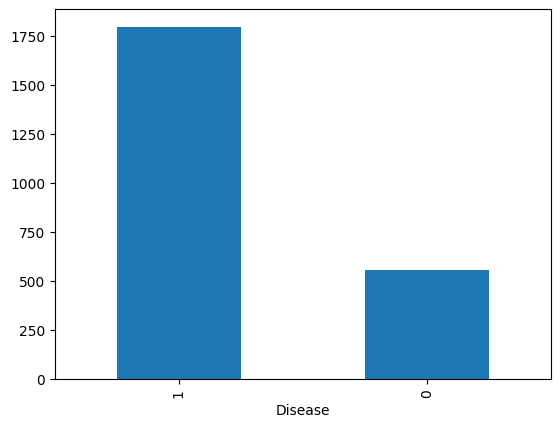

In [ ]:
# Convert target to numerical values
train_data.Disease = [0 if value == "Healthy" else 1 for value in train_data.Disease]
# Visualize distributions of categorical features using bar plots.
train_data["Disease"].value_counts().plot(kind="bar")

In [ ]:
# For categorical features, count the frequency of each category
train_data["Disease"].value_counts()

,count
Disease,
1,1795
0,556


Feature Correlation

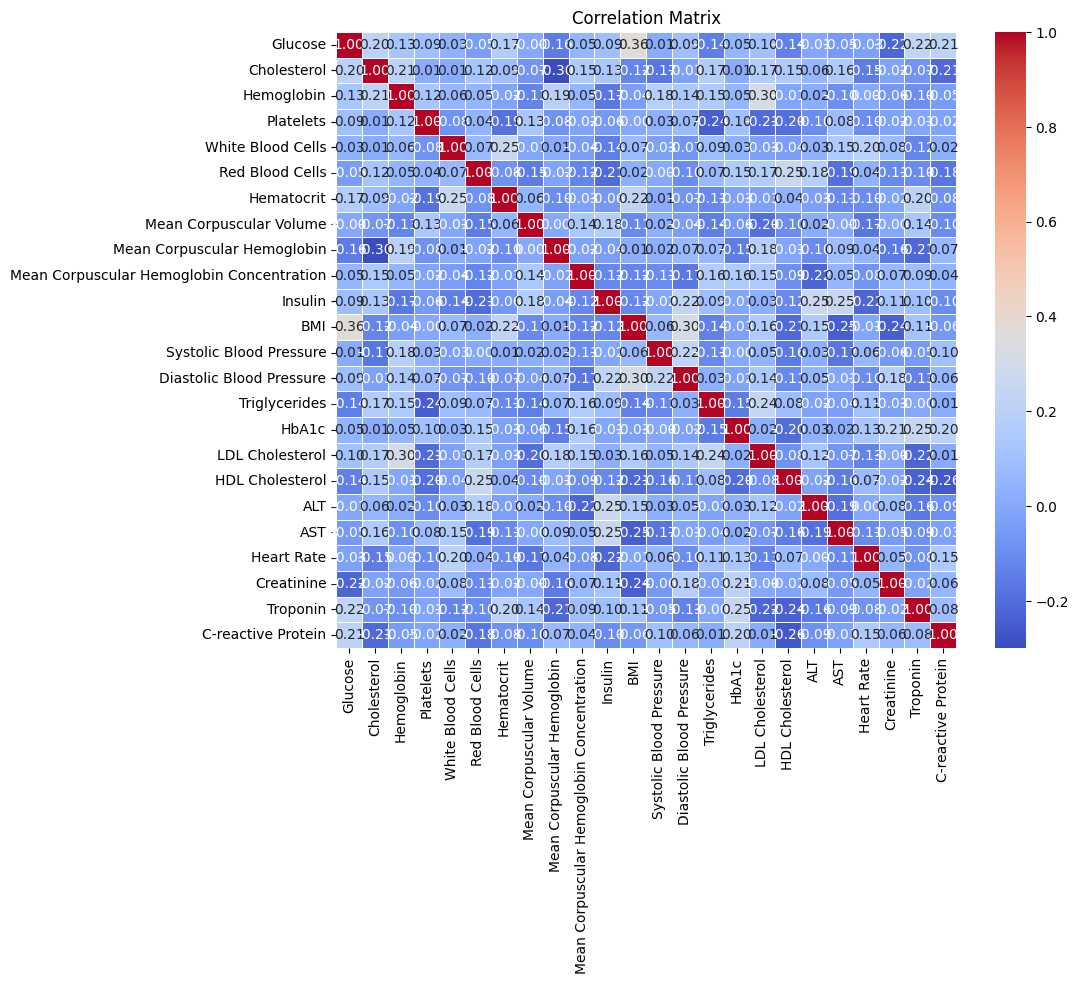

In [ ]:
#Drop the categorical target
numerical_data= train_data.drop("Disease", axis=1)

# Compute the correlation matrix (its like a heatmap)
correlation_matrix = numerical_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths= 0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Check for high correlations
features = numerical_data.columns
found = False  # flag to track if any high correlation is found

for i in range(len(features)):
    for j in range(i + 1, len(features)):
        feature1 = features[i]
        feature2 = features[j]
        corr = correlation_matrix.loc[feature1, feature2]
        if abs(corr) > 0.4:
            print(f"Correlation coefficient between {feature1} and {feature2}: {corr}")
            found = True  # mark that we found at least one high correlation

# If no high correlation was found, print a message
if not found:
    print("No correlation coefficient found above the threshold.")

No correlation coefficient found above the threshold.


Oversampling using SMOTE- (Synthetic Minority Over-sampling Technique.)

It’s an oversampling method that creates synthetic (artificial) examples of the minority class to balance the dataset.

In a typical medical dataset, the diseased cases are fewer, so SMOTE adds synthetic disease cases to balance with healthy ones.

But in your dataset, the healthy cases (0) are fewer, so SMOTE would instead add synthetic healthy samples to balance the two classes.

Before SMOTE- Your model might bias toward predicting “disease”, since it sees far more diseased samples.

It might miss healthy cases (false positives).

In [ ]:
# Create an instance of the SMOTE class
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_train_resampled, y_train_resampled = smote.fit_resample(numerical_data, train_data['Disease'])

In [ ]:
X_train_resampled.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.653472,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.477742,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.088940,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.406528,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.414407,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970


In [ ]:
len(X_train_resampled)

3590

<Axes: xlabel='Disease'>

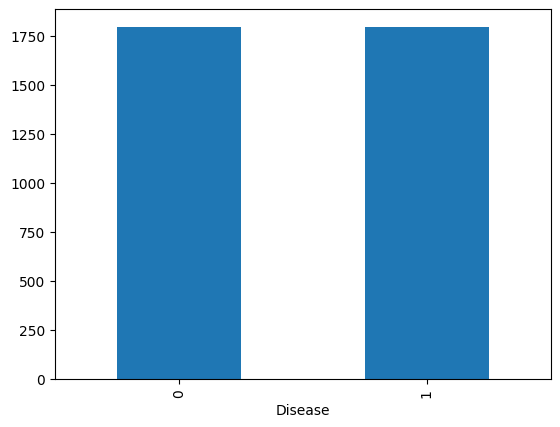

In [ ]:
y_train_resampled.value_counts().plot(kind= "bar")

Spliting the Datasets


In [ ]:
# Split the target from the features for the train data
X_train, y_train = train_data.drop('Disease', axis=1), train_data['Disease']

# Split the target from the features for the train data
test_data.Disease = [0 if value == 'Healthy' else 1 for value in test_data['Disease']]
X_test, y_test = test_data.drop('Disease', axis=1), test_data['Disease']

MODELS:

Here we will use:
1. Logestic Regression
2. Decsion Tree
3. Random Forest


In [ ]:
# 1. Logistic Regression (Using resampled data)
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_resampled, y_train_resampled)
lr_prediction1 = logistic_regression.predict(X_train_resampled)
lr_prediction2 = logistic_regression.predict(X_test)
print("Logistic Regression Accuracy (train):", accuracy_score(y_train_resampled, lr_prediction1))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_prediction2))
print(classification_report(y_test, lr_prediction2))

Logistic Regression Accuracy (train): 0.9866295264623955
Logistic Regression Accuracy: 0.6707818930041153
              precision    recall  f1-score   support

           0       0.02      0.60      0.04         5
           1       0.99      0.67      0.80       481

    accuracy                           0.67       486
   macro avg       0.51      0.64      0.42       486
weighted avg       0.98      0.67      0.79       486



Explaination for above- 2️⃣ Class-wise performance (for each label)

You have two classes:

0 = Healthy

1 = Diseased

Metric Meaning For class 0 (Healthy) For class 1 (Diseased)

Precision Of the predicted samples, how many were actually correct? 0.02 → only 2% of “Healthy” predictions were correct

0.99 → almost all “Diseased” predictions were correct

Recall (Sensitivity) Of all actual samples, how many were correctly found?
0.60 → model found 60% of the actual healthy cases

0.67 → model found 67% of the actual diseased cases

F1-score Balance between precision & recall 0.04 → very poor
0.80 → fairly good

Support Number of samples of that class in test data
Only 5 healthy cases, but 481 diseased

See now here You may wonder why we are using the X_train_resampled as pred1 - here we are using as to check the training accuracy. However, this gives over-optimistic data as it has already seen the data when we usedhere- logistic_regression.fit(X_train_resampled, y_train_resampled).

Here when you see the result- in training its 0.9 and in tes it is 0.6. So this clearing indicates that there is overfitting in the training set of the data.

In [ ]:
# 1. Logistic Regression (Using normal data)
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
lr_prediction3 = logistic_regression.predict(X_train)
lr_prediction4 = logistic_regression.predict(X_test)
print("Logistic Regression Accuracy (train):", accuracy_score(y_train, lr_prediction3))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_prediction4))
print(classification_report(y_test, lr_prediction4))

Logistic Regression Accuracy (train): 0.9574649085495534
Logistic Regression Accuracy: 0.7283950617283951
              precision    recall  f1-score   support

           0       0.02      0.60      0.04         5
           1       0.99      0.73      0.84       481

    accuracy                           0.73       486
   macro avg       0.51      0.66      0.44       486
weighted avg       0.98      0.73      0.83       486



  Decision Tree

In [ ]:
# 2. Decision Trees (Using resampled data)
dtree = DecisionTreeClassifier()
dtree.fit(X_train_resampled, y_train_resampled)
dtree_pred1 = dtree.predict(X_train_resampled)
print("Decision Tree Accuracy (train):", accuracy_score(y_train_resampled, dtree_pred1))
dtree_pred2 = dtree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dtree_pred2))
print(classification_report(y_test, dtree_pred2))

Decision Tree Accuracy (train): 1.0
Decision Tree Accuracy: 0.8662551440329218
              precision    recall  f1-score   support

           0       0.07      1.00      0.13         5
           1       1.00      0.86      0.93       481

    accuracy                           0.87       486
   macro avg       0.54      0.93      0.53       486
weighted avg       0.99      0.87      0.92       486



In [ ]:
# 2. Decision Trees (Using normal data)
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred1 = dtree.predict(X_train)
print("Decision Tree Accuracy (train):", accuracy_score(y_train, dtree_pred1))
dtree_pred2 = dtree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dtree_pred2))
print(classification_report(y_test, dtree_pred2))

Decision Tree Accuracy (train): 1.0
Decision Tree Accuracy: 0.7757201646090535
              precision    recall  f1-score   support

           0       0.03      0.60      0.05         5
           1       0.99      0.78      0.87       481

    accuracy                           0.78       486
   macro avg       0.51      0.69      0.46       486
weighted avg       0.98      0.78      0.86       486



Random Forest

In [ ]:
# 3. Random Forest (Using resampled data)
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)
rf_pred1 = rf.predict(X_train_resampled)
print("Random Forest Accuracy (train):", accuracy_score(y_train_resampled, rf_pred1))
rf_pred2 = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred2))
print(classification_report(y_test, rf_pred2))

Random Forest Accuracy (train): 1.0
Random Forest Accuracy: 0.9567901234567902
              precision    recall  f1-score   support

           0       0.17      0.80      0.28         5
           1       1.00      0.96      0.98       481

    accuracy                           0.96       486
   macro avg       0.58      0.88      0.63       486
weighted avg       0.99      0.96      0.97       486



Here, now you might have noticed that - rf.fit(X_train_resampled, y_train_resampled) using X_train_resmapled & y_train_resampled. Normally we only use one to predict.fit() func. like you can see in other normal data models. We do here because-

1. This is your balanced training data created by SMOTE, RandomOverSampler, or another resampling method.

2. It artificially creates or duplicates minority class samples.

3. The goal: help the model see enough examples of the minority class so it doesn’t get biased toward the majority class.

In [ ]:
# 3. Random Forest (Using normal data)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred1 = rf.predict(X_train)
print("Random Forest Accuracy (train):", accuracy_score(y_train, rf_pred1))
rf_pred2 = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred2))
print(classification_report(y_test, rf_pred2))

Random Forest Accuracy (train): 1.0
Random Forest Accuracy: 0.9403292181069959
              precision    recall  f1-score   support

           0       0.04      0.20      0.06         5
           1       0.99      0.95      0.97       481

    accuracy                           0.94       486
   macro avg       0.51      0.57      0.52       486
weighted avg       0.98      0.94      0.96       486



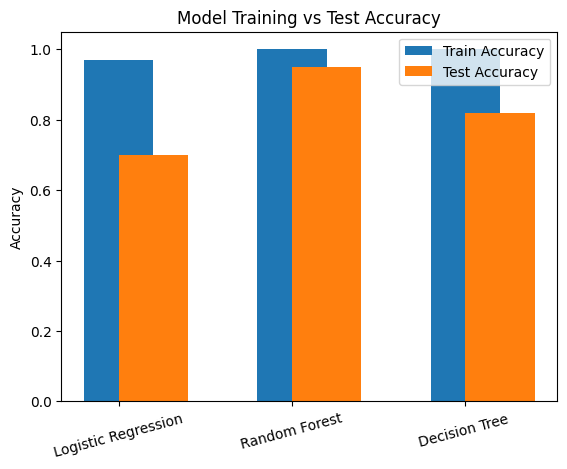

In [ ]:
########### DON'T RUN THIS I HAVE TO FIX THIS ###################################

#To compare all the graphs for our models accuracy
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest', 'Decision Tree ']
train_acc = [0.97, 1.00, 1.00]
test_acc = [0.70, 0.95, 0.82]

x = range(len(models))
plt.bar(x, train_acc, width=0.4, label='Train Accuracy', align='center')
plt.bar(x, test_acc, width=0.4, label='Test Accuracy', align='edge')

plt.xticks(x, models, rotation=15)
plt.ylabel('Accuracy')
plt.title('Model Training vs Test Accuracy')
plt.legend()
plt.show()


plt.xticks(x, models, rotation=15) = plt.xticks(ticks, labels, rotation=angle) :-

1. plt.xticks() is used to set or get the x-axis tick locations and labels.
2. So in your plot, x probably represents numeric positions (e.g., positions for each model).
3. So, X=0 i.e. Log reg, X= 1 i.e. Ran Forest, X= 3 i.e. Decision T.
4. models = models = ['Logistic Regression', 'SVM', 'Random Forest']
5. Rotation is the angle at which the labels need to be represented, i.e. 15 degree.